# Unzip and display planet imagery from orders

This notebook is used to unzip and display planet imagery from orders, it will also 

In [1]:
import os
import glob
import zipfile
import pandas as pd

In [2]:
import itables.interactive
import itables.options as opt
opt.maxBytes=0
opt.classes = ["display", "nowrap"]

/home/dguerrero/.local/lib/python3.6/site-packages/itables/interactive.py:11: FutureWarning: Importing itables.interactive is deprecated.
Please execute instead 'from itables import init_notebook_mode; init_notebook_mode(all_interactive=True)'
  FutureWarning,


<IPython.core.display.Javascript object>

In [8]:
from pathlib import Path

In [ ]:
Path('downloads/')

In [ ]:
os.listdir()

In [ ]:
zip_files = glob.glob('2_NFI/*/*.zip')

In [ ]:
len(zip_files)

In [ ]:
zip_files = [zip_f.replace('Batch1000_','').replace('Next_','') for zip_f in zip_files]

In [ ]:
df_files = []
for zip_ in zip_files:
    folder, sample, zip_file = zip_.split('/')
    archive = zipfile.ZipFile(zip_)
    files = [file.filename for file in archive.filelist if file.filename.endswith('.tif') and 
             not 'udm' in file.filename]
    df_files.append(pd.DataFrame(data=files))
len(df_files)

In [ ]:
df = pd.concat(df_files)

In [ ]:
len(df)/len(df_files)

In [ ]:
df

# Download some files from zip

In [3]:
import pandas as pd
import zipfile
import os
import glob
import random

In [4]:
def extract_without_structure(zip_file, destination_folder):
    """Extract images in a destination folder skipping its structure
    
    files/image.tif will be extracted in destination_folder/sample_name/image.tif
    
    """
    with zipfile.ZipFile(zip_file) as archive:
        files = [file.filename for file in archive.filelist if file.filename.endswith('.tif') and 
                     not 'udm' in file.filename]

        
        print(f'Unziping {len(files)} images in {archive.filename}')
        for file in files:
            zip_info = archive.getinfo(file)
            
            file_name = os.path.basename(zip_info.filename)
            
            split_name = file_name.split('_')
            
            if '3B' in file_name:
                date = pd.to_datetime(split_name[0])
            elif 'BGRN' in file_name or 'BGREN' in file_name:
                date = pd.to_datetime(split_name[2])
            elif 'RE' in file_name:
                date = pd.to_datetime(split_name[1])
            elif 'RGB' in file_name:
                date = pd.to_datetime(split_name[2])
            
            date = date.strftime('%Y_%m_%d')
                            
            
            zip_info.filename  = os.path.join(
                                              os.path.basename(archive.filename)[:-4], 
                                              f'{date}_{os.path.basename(zip_info.filename)}')
            
            archive.extract(zip_info, destination_folder)
    print('Done!')

# Randomly extract a plot

In [5]:
sorted(os.listdir())

['.gd',
 '.ipynb_checkpoints',
 'Image_summary.ipynb',
 'amazon-from-space',
 'dehazed.tif',
 'dehazed2.tif']

In [23]:
zip_ = glob.glob('/home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/*/*.zip')
zip_

['/home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/_0/_0.zip']

In [24]:
extract_without_structure('/home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/_0/_0.zip', '/home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/_0/')

Unziping 22 images in /home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/_0/_0.zip
Done!


In [22]:
# _=[extract_without_structure(random.choice(jambi_zip), 'unzip') for _ in range(2)]

# Visualize images

In [25]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import ipyvuetify as v
import numpy as np

In [26]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def display_normalize_raster(image):
    
    raster = rasterio.open(image)
    date = "_".join(os.path.basename(raster.name).split('_')[:3])
    n_bands = raster.count
    
    if n_bands == 4:
        red = raster.read(3)
        nir = raster.read(4)
        blue = raster.read(1)
    else:
        red = raster.read(1)
        nir = raster.read(2)
        blue = raster.read(3)

    # Normalize the bands
    redn = normalize(red)
    nirn = normalize(nir)
    bluen = normalize(blue)

    # Create RGB natural color composite
    composition = np.dstack((nirn, redn, bluen))

    # Let's see how our color composite looks like
    return composition, date

In [27]:
def display_multiple_img(images, cols=4, height=100, width=40):
    rows = int(len(images)/cols+1.5)
    figure, ax = plt.subplots(nrows=rows,ncols=cols)
    figure.set_figheight(height)
    figure.set_figwidth(width)
    
    for idx, image in enumerate(images):
        composition, date = display_normalize_raster(image)
        ax.ravel()[idx].set_axis_off()
        ax.ravel()[idx].imshow(composition)
        ax.ravel()[idx].set_title(f'{idx}_{date}')
        
#     figure.tight_layout()
    figure

In [38]:
folder = '/home/dguerrero/2_DataNotebooks/4_PLANET_DOWNLOAD/downloads/FAOCO_Biocaribe/_0/'

In [39]:
selection = v.Select(items=sorted([i for i in os.listdir(folder) if not i.startswith('.')]), v_model="None")
selection

Select(items=['_0', '_0.zip', 'manifest.json'], v_model='None')

In [40]:
rasters = sorted(glob.glob(os.path.join(folder,(selection.v_model),'*')))
len(rasters)

22

In [42]:
rasters;

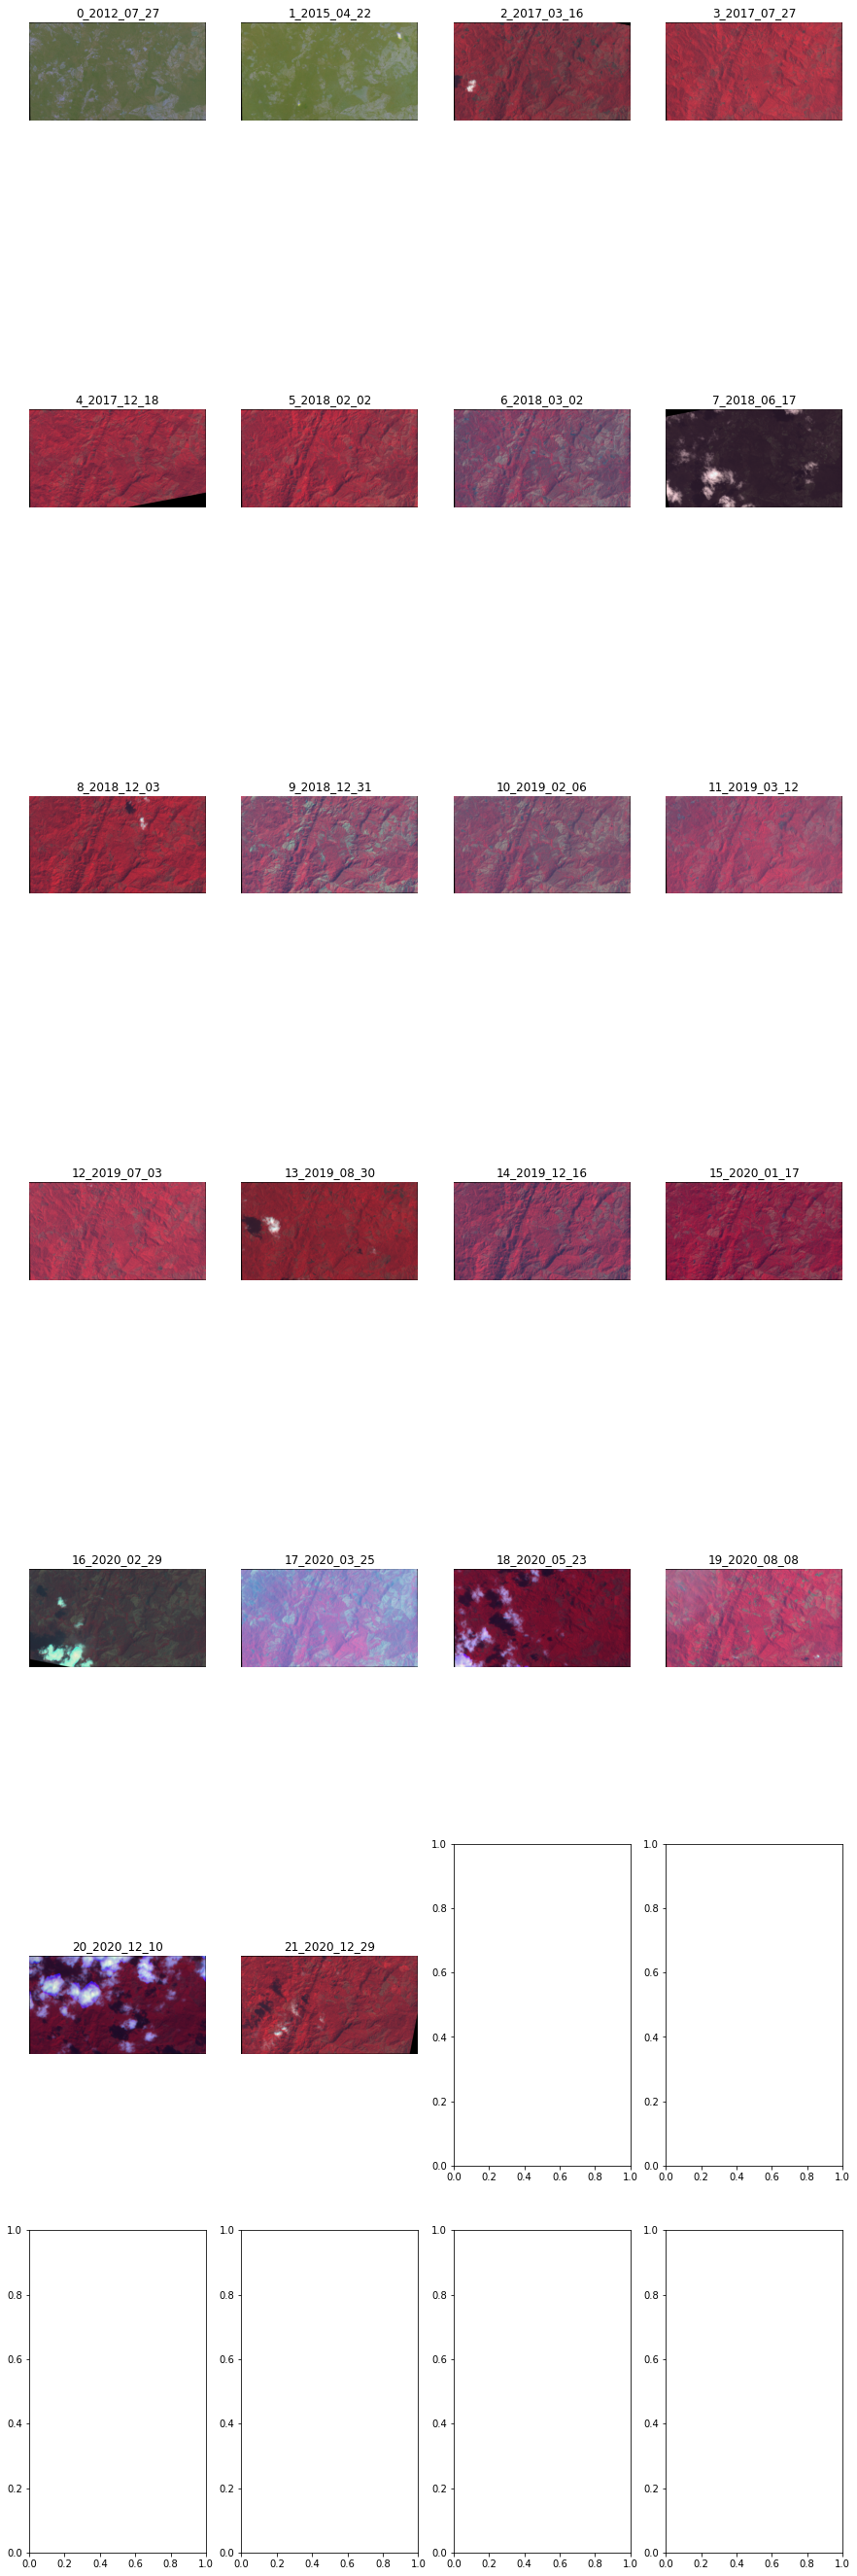

In [44]:
display_multiple_img(rasters, cols = 4, height=50, width=15)